In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [26]:
stock_prices = pd.read_csv('H:\Great learning\FRA\Market+Risk\Market+Risk+Dataset.csv')
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [27]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_')
stock_prices.columns = stock_prices.columns.str.replace('_&_', '_')
stock_prices.head(10)

,Date,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
5,05-05-2014,248,64,502,300,67,5646,606,244,80,239
6,12-05-2014,253,68,508,324,75,6041,596,269,84,244
7,19-05-2014,244,83,528,344,86,6394,567,299,82,289
8,26-05-2014,234,82,563,339,84,6709,593,296,81,241
9,02-06-2014,268,89,561,364,104,7453,582,338,83,259


In [28]:
stock_prices.tail()

,Date,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [29]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [30]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               314 non-null    object
 1   Infosys            314 non-null    int64 
 2   Indian_Hotel       314 non-null    int64 
 3   Mahindra_Mahindra  314 non-null    int64 
 4   Axis_Bank          314 non-null    int64 
 5   SAIL               314 non-null    int64 
 6   Shree_Cement       314 non-null    int64 
 7   Sun_Pharma         314 non-null    int64 
 8   Jindal_Steel       314 non-null    int64 
 9   Idea_Vodafone      314 non-null    int64 
 10  Jet_Airways        314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [31]:
stock_prices.isnull().sum()

Date                 0
Infosys              0
Indian_Hotel         0
Mahindra_Mahindra    0
Axis_Bank            0
SAIL                 0
Shree_Cement         0
Sun_Pharma           0
Jindal_Steel         0
Idea_Vodafone        0
Jet_Airways          0
dtype: int64

In [32]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


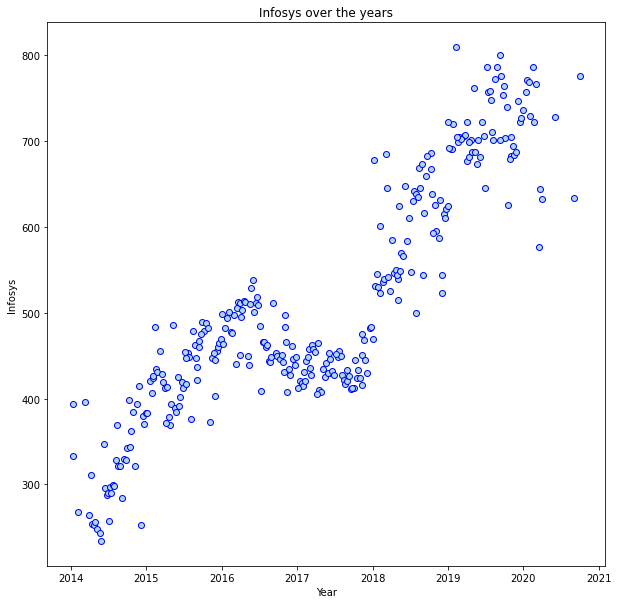

In [33]:
plt.figure(figsize = (10, 10))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

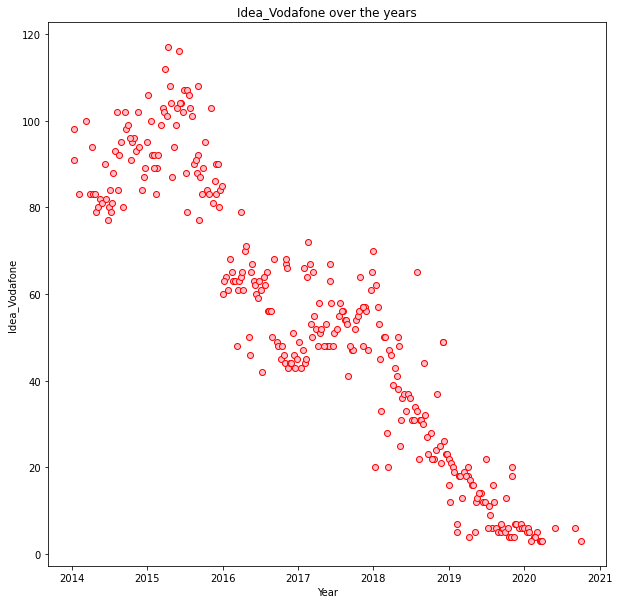

In [34]:
plt.figure(figsize = (10, 10))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the years')
plt.show()

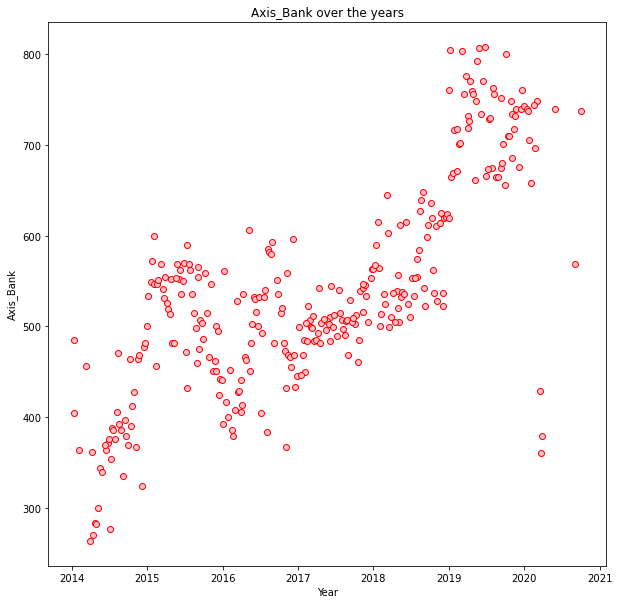

In [35]:
plt.figure(figsize = (10, 10))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis_Bank over the years')
plt.show()

# Analyzing returns

In [44]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [49]:
stock_returns.shape

(314, 10)

In [50]:
stock_returns.head(10)

,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
5,-0.031749,-0.015504,0.040656,0.061875,0.061558,0.011400,-0.008217,0.024898,0.012579,-0.016598
6,0.019961,0.060625,0.011881,0.076961,0.112795,0.067622,-0.016639,0.097543,0.048790,0.020705
7,-0.036221,0.199333,0.038615,0.059898,0.136859,0.056790,-0.049881,0.105732,-0.024098,0.169258
8,-0.041847,-0.012121,0.064183,-0.014642,-0.023530,0.048090,0.044835,-0.010084,-0.012270,-0.181630
9,0.135666,0.081917,-0.003559,0.071154,0.213574,0.105167,-0.018724,0.132686,0.024391,0.072031


In [51]:
stock_returns.max()

Infosys              0.135666
Indian_Hotel         0.199333
Mahindra_Mahindra    0.089407
Axis_Bank            0.127461
SAIL                 0.309005
Shree_Cement         0.152329
Sun_Pharma           0.166604
Jindal_Steel         0.243978
Idea_Vodafone        0.693147
Jet_Airways          0.300249
dtype: float64

In [52]:
stock_returns.min()

Infosys             -0.167300
Indian_Hotel        -0.236389
Mahindra_Mahindra   -0.285343
Axis_Bank           -0.284757
SAIL                -0.251314
Shree_Cement        -0.129215
Sun_Pharma          -0.179855
Jindal_Steel        -0.283768
Idea_Vodafone       -0.693147
Jet_Airways         -0.458575
dtype: float64

# Means & Standard Deviations of these returns

In [57]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys              0.002794
Indian_Hotel         0.000266
Mahindra_Mahindra   -0.001506
Axis_Bank            0.001167
SAIL                -0.003463
Shree_Cement         0.003681
Sun_Pharma          -0.001455
Jindal_Steel        -0.004123
Idea_Vodafone       -0.010608
Jet_Airways         -0.009548
dtype: float64

In [58]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys              0.035070
Indian_Hotel         0.047131
Mahindra_Mahindra    0.040169
Axis_Bank            0.045828
SAIL                 0.062188
Shree_Cement         0.039917
Sun_Pharma           0.045033
Jindal_Steel         0.075108
Idea_Vodafone        0.104315
Jet_Airways          0.097972
dtype: float64

In [59]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


# A plot of Stock Means vs Standard Deviation and state your inference

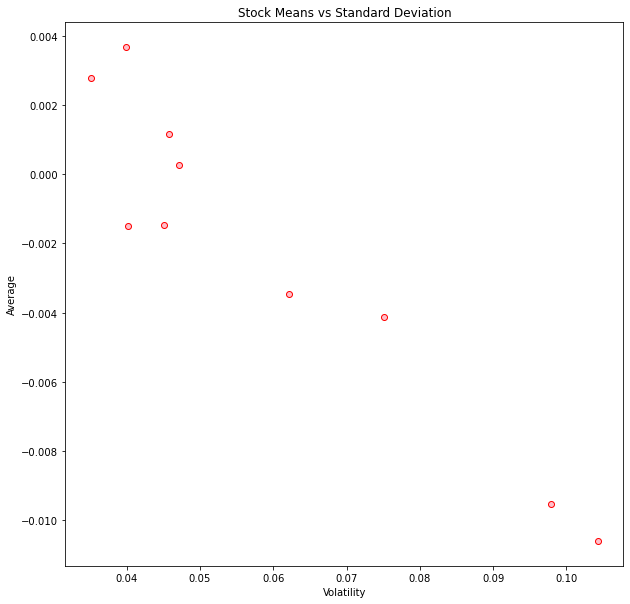

In [60]:
plt.figure(figsize = (10, 10))
plt.scatter(df['Volatility'], df['Average'], edgecolors='r', color = 'pink')
plt.xlabel('Volatility')
plt.ylabel('Average')
plt.title('Stock Means vs Standard Deviation')
plt.show()